# McDonald's diet Analysis

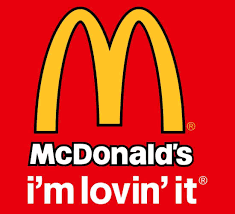
## 📌<span style="color:orange">About Dataset</span>
### 🍔Context

**McDonald’s** in India was started in 1996 in Bandra, Mumbai with one single restaurant. It took almost twelve years to grow one restaurant to 50. Today, McDonald's, that arrived in India without its signature Big Mac (substituted in India by the Maharaja Mac) has about 480 stores all over India providing happy meals to folks and families of India.

### 🍔Content

This dataset provides a nutrition analysis of every menu item on the Indian McDonald's menu, including breakfast, burgeres, fries, salads, soda, coffee and tea, milkshakes, and desserts.

The dataset 'McDonald's India' provides the info of the meal specifying different nutritions like saturation fats, total carbohydrate, protein, trans fat, energy, & cholesterols.
 
---

## 📌<span style="color:orange">Questions about the dataset</span>

**Analysis-1**: Which type pf menu are mostly consumed by the customers?

**Analysis-2**: How does each nutritions in the menu varie with each other? How these nutritions will affect the health?

**Analysis-3**: Can a heart or diabetic patient consume these items? If so what type of items they will buy?

**Analysis-4**: For a normal working person, Is it good to consume meal to have balanced diet?





## 📚<span style="color: orange">Importing libraries and data</span>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mcdonalds-india-menu-nutrition-facts/India_Menu.csv


In [2]:
df= pd.read_csv('../input/mcdonalds-india-menu-nutrition-facts/India_Menu.csv')
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


---
## 📚 <span style="color:orange">Data wrangling</span>


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [4]:
df2=df.fillna(method='pad')
df2.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [5]:
df2.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [6]:
df['Menu Category'].value_counts()

McCafe Menu        51
Regular Menu       36
Beverages Menu     17
Breakfast Menu     15
Gourmet Menu       11
Condiments Menu     9
Desserts Menu       2
Name: Menu Category, dtype: int64

In [7]:
df2.columns

Index(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')

In [8]:
df2.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,369.757801
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,480.237260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,44.530000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,153.150000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,545.340000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


In [9]:
df2.duplicated().sum()

0

---
## 📚<span style="color:orange">Exploratory Data Analysis(EDA)</span>


## 💡<span style="color:green">Analysis-1</span>

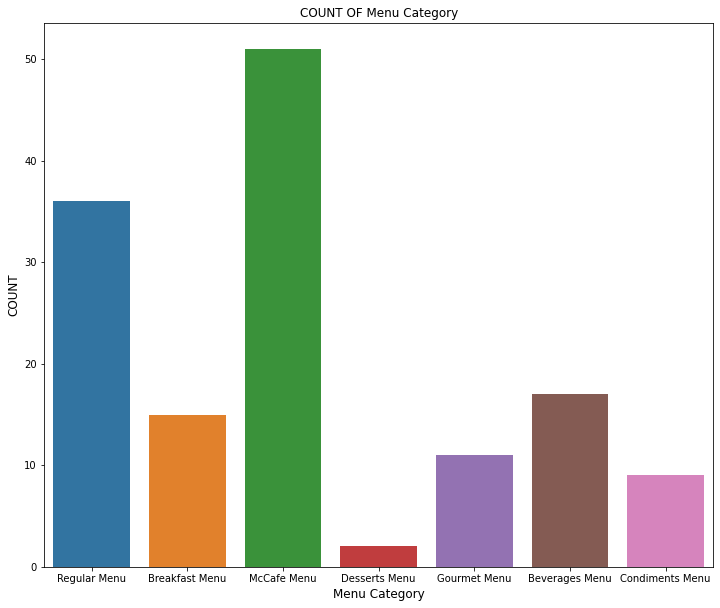

In [10]:
plt.figure(figsize=(12,10))
sns.countplot(x=df2['Menu Category'])
plt.title("COUNT OF Menu Category",fontsize=12)
plt.xlabel("Menu Category",fontsize=12)
plt.ylabel("COUNT",fontsize=12)
plt.show()


## 📍Observation-1
 **Regula menu & McCafe menu have the highest count. Reason behind is that most customers have burger or other meals with beverages as it gives the best meal combinations. Thus to provide more choices in beverages, For example some customers might not drink cappuccino beacuse of their taste preferences or have lactoce intolerance so they will have americano.**
 
 ---

## 💡<span style="color:green">Analysis-2</span>

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


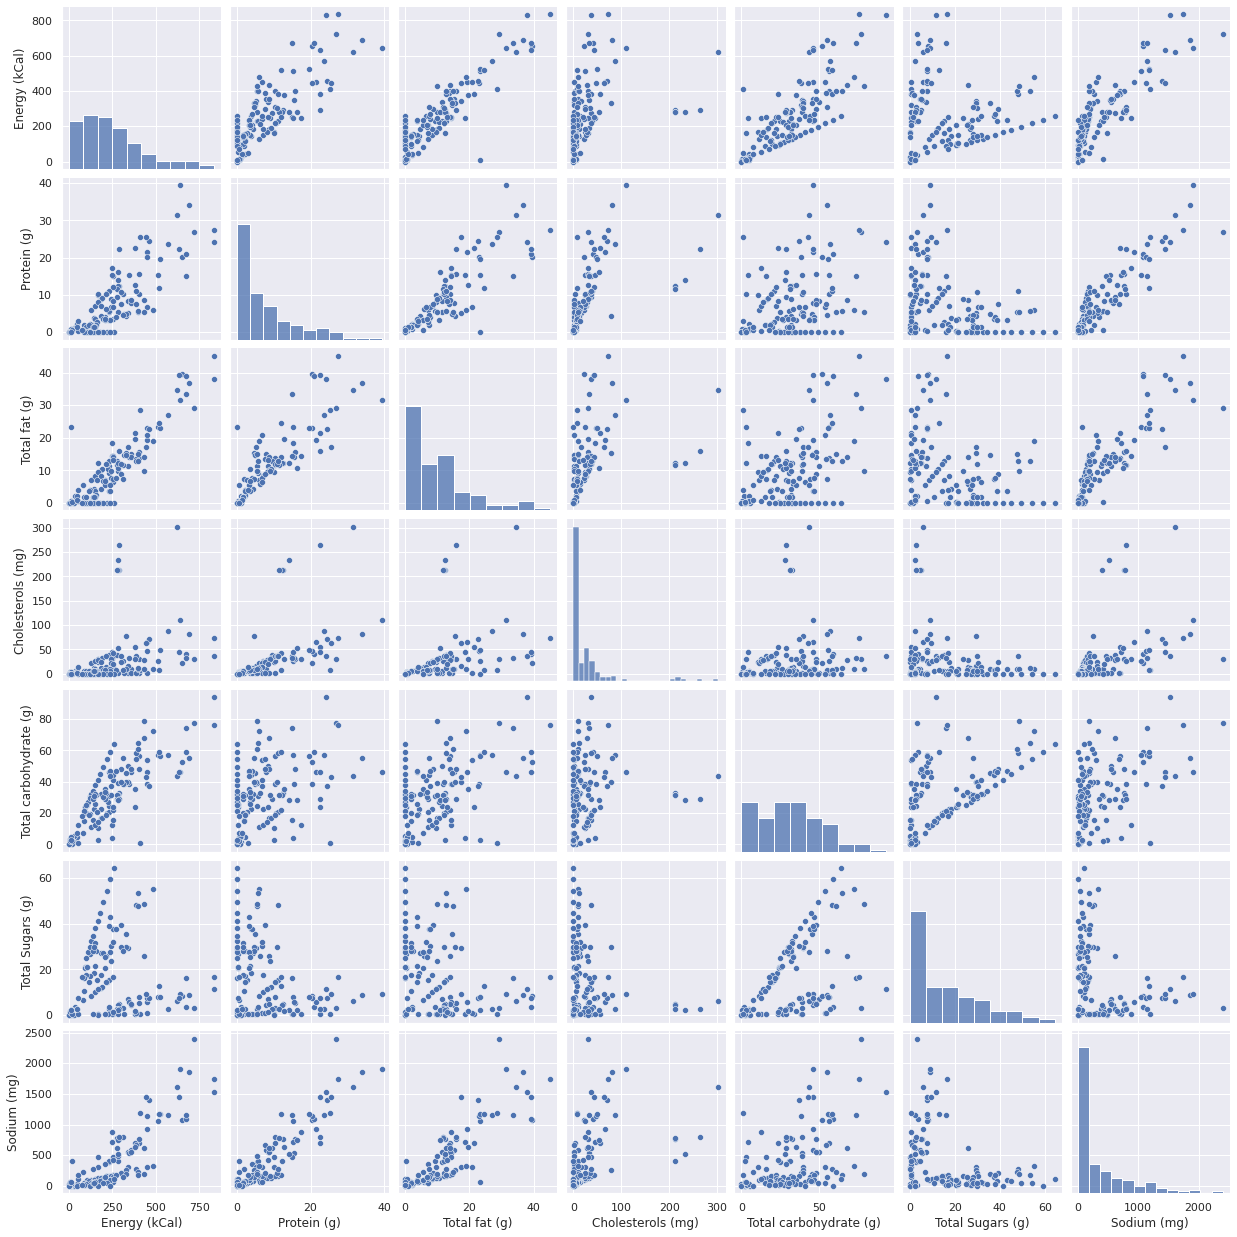

In [11]:
sns.set()
cal = ['Energy (kCal)',
       'Protein (g)', 'Total fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)', 'Sodium (mg)']
sns.pairplot(df2[cal], size = 2.5)
plt.show();

## 📍Observation-2

**Comparing all the nutritions with each other shows that most meals doesn't contain heavy nutritions, so it is safe for the customers to consume it.** 

**All meals contain the balanced nutritions in per serve but if it is taken in high quantity then it will be harmful for the body.Excessive consumption may cause severe disease or obese.** 

---

## 💡<span style="color:green">Analysis-3</span>

### 🍔What is saturated fat?

**Saturated fat** is a type of dietary fat. It is one of the unhealthy fats, along with trans fat. 

 These fats are most often solid at room temperature. Foods like **butter, palm and coconut oils, cheese, and red meat** have high amounts of saturated fat.

### 🍔What is trans fat?

Trans fat is considered the **worst type of fat to eat**. Unlike other dietary fats, trans fats — also called trans-fatty acids — raise **"bad" cholesterol** and also lowers "good" cholesterol. A diet laden with trans fats increases the risk of heart disease, the leading killer of adults.

### 🍔Where does cholesterol are found?
 Foods that contain cholesterol and are high in saturated fat. Full fat dairy foods such as milk, cheese, yogurt and cream. Animal fats, such as butter, ghee, margarines and spreads made from animal fats, lard, suet and dripping. Fatty meat and processed meat products such as sausages.
 
  **High cholesterol** is mainly caused by eating fatty food, not exercising enough, being overweight, smoking and drinking alcohol. You can lower your cholesterol by eating healthily and getting more exercise. Some people also need to take medicine.

### 🍔What is Carbohydrates?

**Carbohydrates**, or carbs, are sugar molecules. Along with proteins and fats, carbohydrates are one of three main nutrients found in foods and drinks. Your body breaks down **carbohydrates into glucose**. Glucose, or blood sugar, is the **main source of energy** for your body's cells, tissues, and organs.

In this visualization we will see which menu category will have good intake of carbohydrates and energy as per working person.


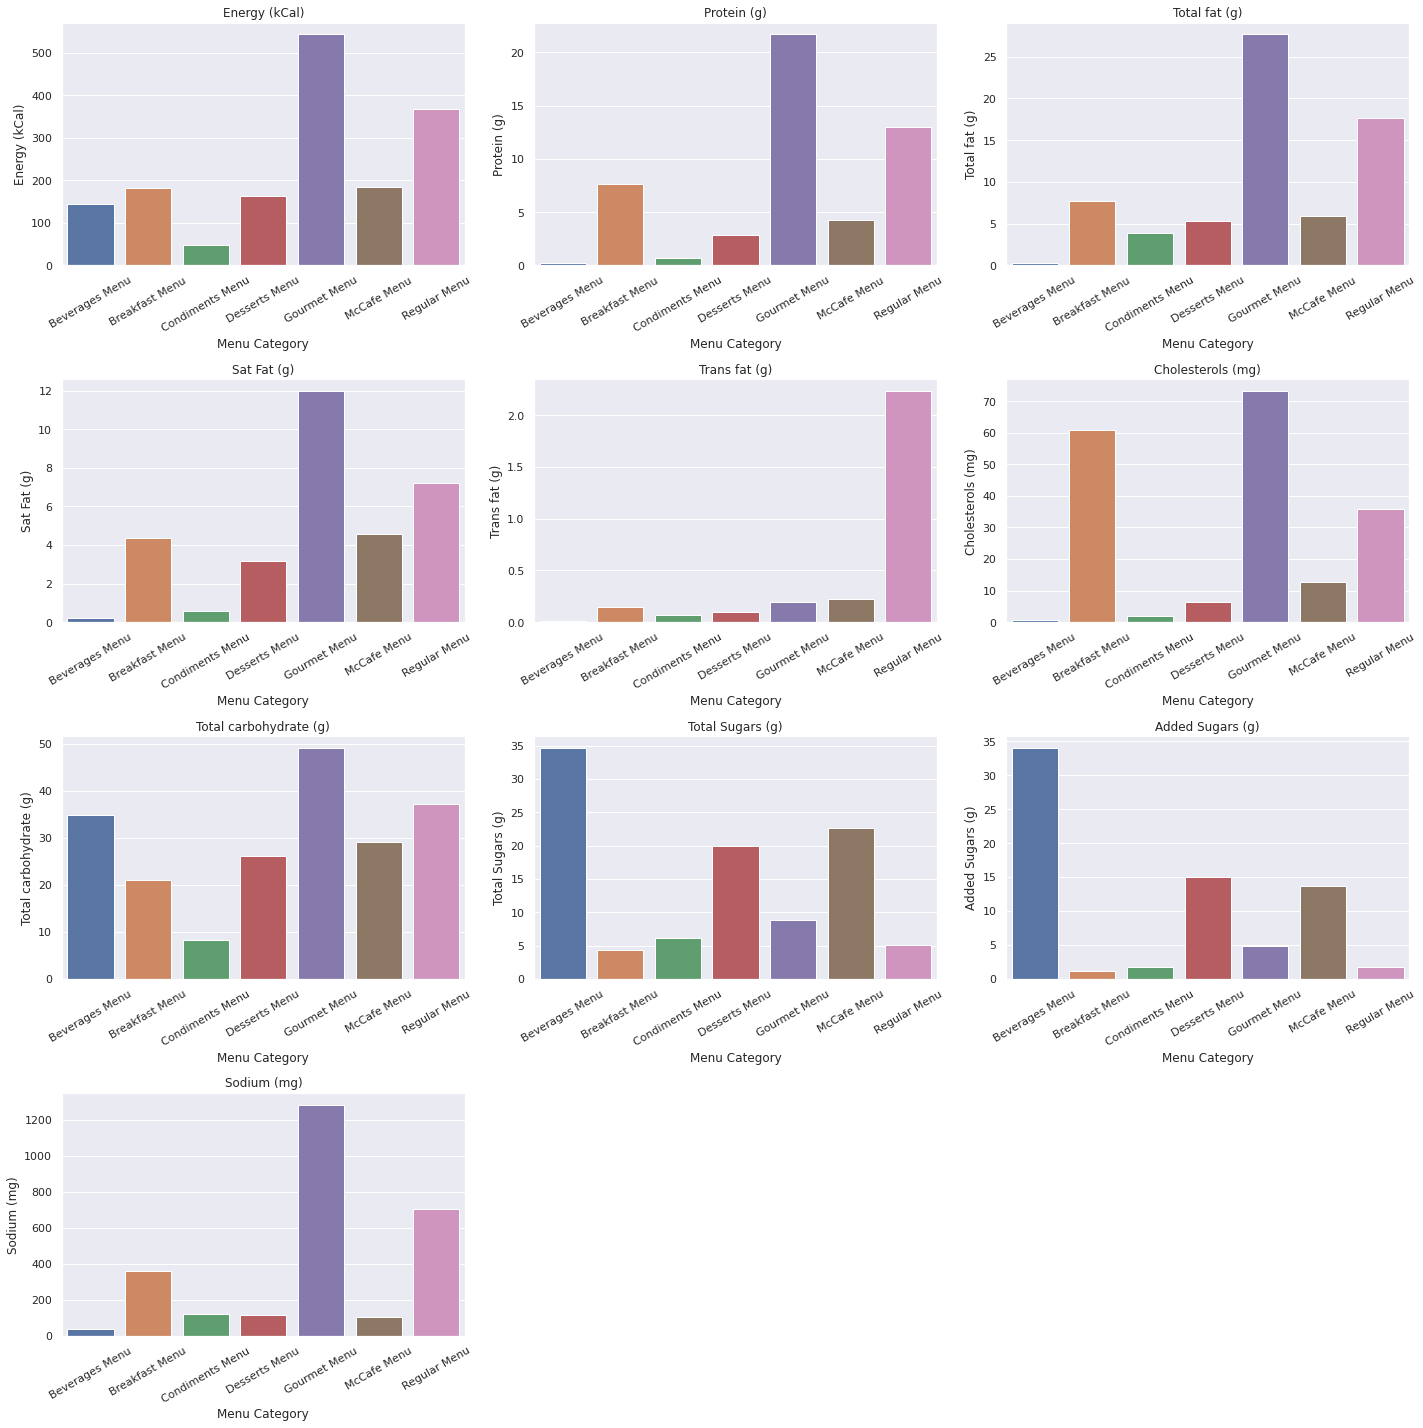

In [12]:
df_menu=df2.groupby('Menu Category').mean()
num_list=['Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)']
fig = plt.figure(figsize=(20,20))

for i in range(len(num_list)):
    plt.subplot(4,3,i+1)
    plt.title(num_list[i])
    ax=sns.barplot(y=df_menu[num_list[i]],x=df_menu.index)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

plt.tight_layout()

## 📍Observation-3
**Yes, a heart or diabetics person can have the meal as some meals contain less carbohydrate, cholesterols, & sugar. Consuming excess carbohydrate and cholesterols would lead to chrobic heart disease, may lead to heart attack.**

**The best meal for the heart & diabetic person is breakfast menu  and they should avoid Gourmet menu as it contains high carbohydrates, chalories and sugar.**

**Also trans fat is bad for the health as it increases the risk of heart and blood vessels diseases. In this analysis, Regular menu has the highest count of trans fat, so they should avoid regular menu.**

---

## 💡 <span style="color:green">Analysis-4</span>

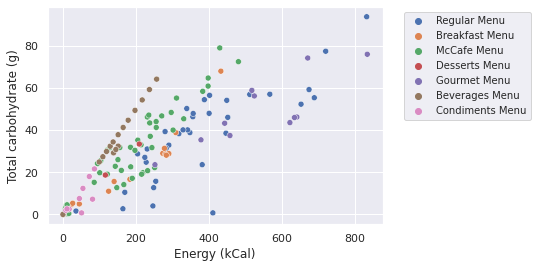

In [13]:
sns.scatterplot(data=df2,x='Energy (kCal)',y='Total carbohydrate (g)',hue='Menu Category')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.5, fontsize=10)

## 📍Observation-4
**Normal daily calorie intake for male should be 2500 cal and for female should be 2000 cal so to have balanced diet, normal working people should consume less items from McDonald's as it contains high calories intake and carbohydrate.** 

**If they wish to have it then they can go for McCafe menu like Americano.**

---

## 📚<span style="color:orange">Conclusion</span>

**This analysis is for people who are cautious for their health or have heart dieases / diabeties. Having fast food twice in a month won't affect the health that much.** 

**Other than McDonalds, other fast food shops have same amount of calories, so people must have a balanced diet at their home to live a healthy life.** 

## Thank you